<a href="https://colab.research.google.com/github/ottodranik/machine-learning/UA_simple_neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Проста нейронна мережа

Тут представлена реалізація простої архітектури нейронної мережі, яка може спіставити $2$-розмірні вхідні вектори та отримати на виході бінарні значення. Наша мережа матиме $2$ вхідних нейрона, один прихований шар із $6$ прихованими нейронами та вихідний шар з $1$ вихідним нейроном.

Ми представимо архітектуру за допомогою вагових матриць між шарами. У нашому прикладі вагова матриця між вхідним та прихованим (hidden) шаром буде позначена як $W_h$, матриця ваги між прихованим та вихідним (outputs) шаром – як $W_o$. На додаток до вагових коефіцієнтів, що з'єднують нейрони, кожен прихований і вихідний нейрон матиме вагу зсуву з постійним входом $+1$.

Наш навчальний набір складається з $m = 750$ прикладів. Тому ми матимемо такі форми матриць:
- Форма навчального набору: $X = (750, 2)$
- Форма цілей: $Y = (750, 1)$
- $W_h$ форма: $(n_{features}, n_{hidden}) = (2, 6)$
- $b_h$ форма (вектор зсуву): $(1, n_{hidden}) = (1, 6)$
- $W_o$ форма: $(n_{hidden}, n_{outputs}) = (6, 1)$
- $b_o$ форма (вектор зсуву): $(1, n_{outputs}) = (1, 1)$

![caption](https://github.com/YKochura/ml_basics/blob/main/figures/neural_net.png?raw=1)

### Функція втрат

Ми будемо використовувати ту саму функцію втрат, що й при логістичній регресії:

\begin{equation}
J(\boldsymbol{w},b) = - \frac{1}{m} \sum_{i=1}^m \Big[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \big(1 - \log(\hat{y}^{(i)})\big) \Big] 
\end{equation}

Для класифікаційного завдання з більш ніж двома класами ми використали б узагальнення цієї функції, а саме категоріальну перехресну ентропію (cross-entropy).

### Тренування

Ми будемо навчати нашу мережу з градієнтним спуском і використовувати зворотнє розповсюдження для обчислення необхідних часткових похідних. Процедура навчання складається з наступних етапів:
1. Ініціалізувати параметри (тобто вагові коефіцієнти та зсуви)
2. Повторювати до зближення:
  1. Поширювати поточну вхідну групу вперед мережею. Для цього слід обчислити активації та вихідні дані всіх прихованих та вихідних одиниць.
  2. Обчислити часткові похідні функції втрат відносно кожного параметра
  3. Оновити параметри

### Передача даних вперед

Ми починаємо з обчислення активації та вихідних даних кожного блоку в нашій мережі. Щоб пришвидшити реалізацію, ми не будемо робити це для кожного прикладу вхідних даних окремо, а зробимо це для всіх прикладів одночасно, використавши векторизацію. Ми будемо використовувати такі позначення:

- $\boldsymbol{A}_h$: матриця з активаціями всіх прихованих (hidden) одиниць для всіх навчальних прикладів
- $\boldsymbol{O}_h$: матриця з виходними даними (outputs) всіх прихованих одиниць для всіх навчальних прикладів

Приховані нейрони матимуть функцію активації $\tanh$:
\begin{equation}
\tanh(x) = \frac{sinh(x)}{cosh(x)} = \frac{\exp(x) - exp(-x)}{\exp(x) + exp(-x)}
\end{equation}
\begin{equation}
\tanh'(x) = 1 - tanh^2(x)
\end{equation}

Вихідні нейрони матимуть функцію активації $\textit {sigmoid}$:
\begin{equation}
\sigma(x) = \frac{1}{1 + \exp(-x)}
\end{equation}
\begin{equation}
\sigma'(x) = 1 - (1 + \sigma(x))
\end{equation}

Потім активації та результати можна обчислити наступним чином ($\cdot$ – скалярний добуток):

\begin{equation}
\boldsymbol{A}_h = \boldsymbol{X} \cdot \boldsymbol{W}_h + \boldsymbol{b}_h, \text{shape: } (750, 6)
\end{equation}
\begin{equation}
\boldsymbol{O}_h = \sigma(\boldsymbol{A}_h), \text{shape: } (750, 6)
\end{equation}

\begin{equation}
\boldsymbol{A}_o = \boldsymbol{O}_h \cdot \boldsymbol{W}_o + b_o, \text{shape: } (750, 1)
\end{equation}
\begin{equation}
\boldsymbol{O}_o = \sigma(\boldsymbol{A}_o), \text{shape: } (750, 1)
\end{equation}


### Зворотня передача даних

Для обчислення оновленних вагових коефіцієнтів нам потрібні часткові похідні функції втрат щодо кожної одиниці. Я не буду давати тут виведення цих рівнянь, ви знайдете безліч хороших пояснень на інших веб-сайтах (наприклад, [тут](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/)).

Для вихідних нейронів градієнти задаються як (матричні позначення):  

$\frac{\partial L}{\partial \boldsymbol{A}_o} = d\boldsymbol{A}_o = (\boldsymbol{O}_o - \boldsymbol{Y})$  

$\frac{\partial L}{\partial \boldsymbol{W}_o} = \frac{1}{m} (\boldsymbol{O}_h^T \cdot d\boldsymbol{A}_o)$  

$\frac{\partial L}{\partial \boldsymbol{b}_o} = \frac{1}{m} \sum d\boldsymbol{A}_o$  

Для вагової матриці між вхідним (input) та прихованим (hidden) шаром ми маємо:
$\frac{\partial L}{\partial \boldsymbol{A}_h} = d\boldsymbol{A}_h = (\boldsymbol{W}_o^T \cdot d\boldsymbol{A}_o) * (1 - \tanh^2 (\boldsymbol{A}_h))$  

$\frac{\partial L}{\partial \boldsymbol{W}_h} = \frac{1}{m} (\boldsymbol{X}^T \cdot d\boldsymbol{A}_h)$  

$\frac{\partial L}{\partial \boldsymbol{b}_h} = \frac{1}{m} \sum d\boldsymbol{A}_h$  

### Оновлення вагових коефіцієнтів

$\boldsymbol{W}_h = \boldsymbol{W}_h - \eta * \frac{\partial L}{\partial \boldsymbol{W}_h}$  

$\boldsymbol{b}_h = \boldsymbol{b}_h - \eta * \frac{\partial L}{\partial \boldsymbol{b}_h} $  

$\boldsymbol{W}_o = \boldsymbol{W}_o - \eta *   \frac{\partial L}{\partial \boldsymbol{W}_o} $  

$\boldsymbol{b}_o = \boldsymbol{b}_o - \eta *  \frac{\partial L}{\partial \boldsymbol{b}_o} $  



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
np.random.seed(123)

% matplotlib inline

## Набір даних

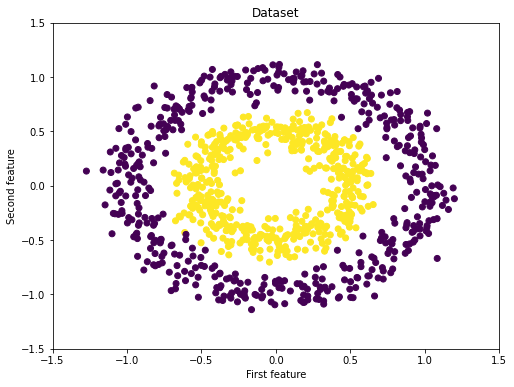

In [4]:
X, y = make_circles(n_samples=1000, factor=0.5, noise=.1)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [5]:
# reshape targets to get column vector with shape (n_samples, 1)
y_true = y[:, np.newaxis]
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (750, 2)
Shape y_train: (750, 1)
Shape X_test: (250, 2)
Shape y_test: (250, 1)


## Клас нейронної мережі (Neural Network)

Деякі частини цьєї реалізації з'явились під впливом вправ з [курсу Coursera](https://www.coursera.org/learn/neural-networks-deep-learning) від  Andrew Ng's

In [6]:
class NeuralNet():
    
    def __init__(self, n_inputs, n_outputs, n_hidden):
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.hidden = n_hidden

        # Initialize weight matrices and bias vectors
        self.W_h = np.random.randn(self.n_inputs, self.hidden)
        self.b_h = np.zeros((1, self.hidden))
        self.W_o = np.random.randn(self.hidden, self.n_outputs)
        self.b_o = np.zeros((1, self.n_outputs))

    def sigmoid(self, a):
        return 1 / (1 + np.exp(-a))

    def forward_pass(self, X):
        """
        Propagates the given input X forward through the net.

        Returns:
            A_h: matrix with activations of all hidden neurons for all input examples
            O_h: matrix with outputs of all hidden neurons for all input examples
            A_o: matrix with activations of all output neurons for all input examples
            O_o: matrix with outputs of all output neurons for all input examples
        """
        # Compute activations and outputs of hidden units
        A_h = np.dot(X, self.W_h) + self.b_h
        O_h = np.tanh(A_h)

        # Compute activations and outputs of output units
        A_o = np.dot(O_h, self.W_o) + self.b_o
        O_o = self.sigmoid(A_o)

        outputs = {
                "A_h": A_h,
                "A_o": A_o,
                "O_h": O_h,
                "O_o": O_o,
                }

        return outputs


    def cost(self, y_true, y_predict, n_samples):
        """
        Computes and returns the cost over all examples
        """
        # same cost function as in logistic regression
        cost = (- 1 / n_samples) * np.sum(y_true * np.log(y_predict) + (1 - y_true) * (np.log(1 - y_predict)))
        cost = np.squeeze(cost)
        assert isinstance(cost, float)

        return cost

    def backward_pass(self,  X, Y, n_samples, outputs):
        """
        Propagates the errors backward through the net.

        Returns:
            dW_h: partial derivatives of loss function w.r.t hidden weights
            db_h: partial derivatives of loss function w.r.t hidden bias
            dW_o: partial derivatives of loss function w.r.t output weights
            db_o: partial derivatives of loss function w.r.t output bias
        """

        dA_o = (outputs["O_o"] - Y)
        dW_o = (1 / n_samples) * np.dot(outputs["O_h"].T, dA_o)
        db_o = (1 / n_samples) * np.sum(dA_o)

        dA_h = (np.dot(dA_o, self.W_o.T)) * (1 - np.power(outputs["O_h"], 2))
        dW_h = (1 / n_samples) * np.dot(X.T, dA_h)
        db_h = (1 / n_samples) * np.sum(dA_h)

        gradients = {
                "dW_o": dW_o,
                "db_o": db_o,
                "dW_h": dW_h,
                "db_h": db_h,
                }

        return gradients

    def update_weights(self, gradients, eta):
        """
        Updates the model parameters using a fixed learning rate
        """
        self.W_o = self.W_o - eta * gradients["dW_o"]
        self.W_h = self.W_h - eta * gradients["dW_h"]
        self.b_o = self.b_o - eta * gradients["db_o"]
        self.b_h = self.b_h - eta * gradients["db_h"]

    def train(self, X, y, n_iters=500, eta=0.3):
        """
        Trains the neural net on the given input data
        """
        n_samples, _ = X.shape

        for i in range(n_iters):
            outputs = self.forward_pass(X)
            cost = self.cost(y, outputs["O_o"], n_samples=n_samples)
            gradients = self.backward_pass(X, y, n_samples, outputs)

            if i % 100 == 0:
                print(f'Cost at iteration {i}: {np.round(cost, 4)}')

            self.update_weights(gradients, eta)


    def predict(self, X):
        """
        Computes and returns network predictions for given dataset
        """
        outputs = self.forward_pass(X)
        y_pred = [1 if elem >= 0.5 else 0 for elem in outputs["O_o"]]

        return np.array(y_pred)[:, np.newaxis]

### Ініціалізація та навчання нейронної мережі

In [7]:
nn = NeuralNet(n_inputs=2, n_hidden=6, n_outputs=1)
print("Shape of weight matrices and bias vectors:")
print(f'W_h shape: {nn.W_h.shape}')
print(f'b_h shape: {nn.b_h.shape}')
print(f'W_o shape: {nn.W_o.shape}')
print(f'b_o shape: {nn.b_o.shape}')
print()

print("Training:")
nn.train(X_train, y_train, n_iters=2000, eta=0.7)

Shape of weight matrices and bias vectors:
W_h shape: (2, 6)
b_h shape: (1, 6)
W_o shape: (6, 1)
b_o shape: (1, 1)

Training:
Cost at iteration 0: 1.0872
Cost at iteration 100: 0.2723
Cost at iteration 200: 0.1712
Cost at iteration 300: 0.1386
Cost at iteration 400: 0.1208
Cost at iteration 500: 0.1084
Cost at iteration 600: 0.0986
Cost at iteration 700: 0.0907
Cost at iteration 800: 0.0841
Cost at iteration 900: 0.0785
Cost at iteration 1000: 0.0739
Cost at iteration 1100: 0.0699
Cost at iteration 1200: 0.0665
Cost at iteration 1300: 0.0635
Cost at iteration 1400: 0.061
Cost at iteration 1500: 0.0587
Cost at iteration 1600: 0.0566
Cost at iteration 1700: 0.0547
Cost at iteration 1800: 0.0531
Cost at iteration 1900: 0.0515


## Тестування нейронної мережі


In [8]:
n_test_samples, _ = X_test.shape
y_predict = nn.predict(X_test)
print(f"Classification accuracy on test set: {(np.sum(y_predict == y_test)/n_test_samples)*100} %")

Classification accuracy on test set: 98.4 %


## Візуалізація рішення

На найнижчому графіку ми бачимо, які частини вхідного простору класифікуються як позитивні, а які – як негативні за допомогою навченої мережі.

In [9]:
X_temp, y_temp = make_circles(n_samples=60000, noise=.5)
y_predict_temp = nn.predict(X_temp)
y_predict_temp = np.ravel(y_predict_temp)

Text(0.5,1,'Decision boundary')

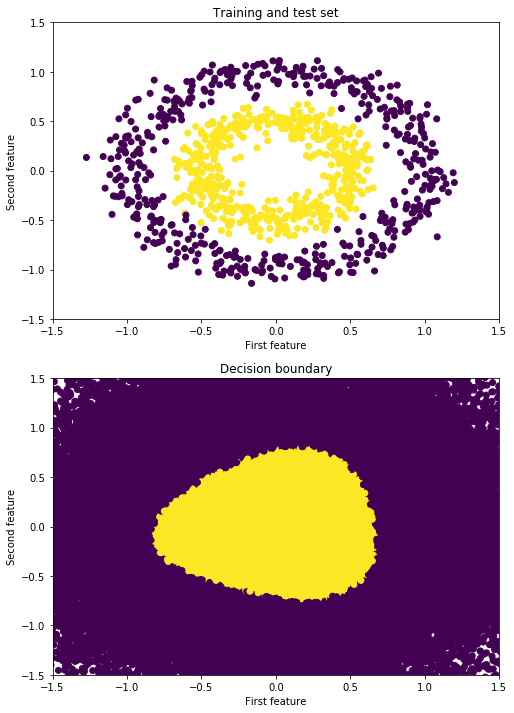

In [ ]:
fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(2,1,1)
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.title("Training and test set")

ax = fig.add_subplot(2,1,2)
plt.scatter(X_temp[:,0], X_temp[:,1], c=y_predict_temp)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.title("Decision boundary")

* * *
### Переваги
- Здатні коректно функціонувати, навіть якщо на вході дані є зашумленими.
- Можуть підлаштовуватися під зміни навколишнього середовища. Наприклад, прогнозування зростання/падіння цін на біржі.
- Здатні нормально функціонувати навіть при досить серйозних пошкодженнях їх елементів.
- Вирішують завдання швидше відносно інших алгоритмів.
- У порівнянні з лінійними методами статистики (лінійна регресія, авторегресія, лінійний дискриминант) нейромережі дозволяють ефективно будувати нелінійні залежності (відображення, що розділяють поверхні).
- Знову ж таки у порівнянні з лінійними методами статистики, при навчанні нейромережі замість критерію якості у вигляді найменших квадратів можна використовувати робастні критерії (робастість – нечутливість до різних відхилень і неоднорідностей у вибірці), додатково вести оптимізацію та інших властивостей нейронної мережі.
- Необхідність вирішення прямої і зворотної задач зазвичай вимагає побудови двох моделей. При використанні ж нейронних мереж можна обійтися однією мережею, навченої вирішувати пряму задачу.
- Нейромережа одночасно може вирішувати декілька завдань (при наявності у неї декількох виходів).

### Недоліки
- Дають приблизну відповідь та не здатні давати точні і однозначні відповіді.
- Вирішують задачу "загалом" і не можуть вирішувати задачі покроково. 
- Погано справляються з обчислювальними задачами.
- Великі нейромережі можуть вимагати високої обчислювальної потужності.
- Для налагодження і налаштування алгоритму потрібна велика кількість тестових даних.

**У підсумку:** нейронні мережі – сукупність взаємодіючих між собою штучних нейронів. Можуть бути використані для розв'язання майже будь-якого класу задач. Як приклад, робота зі складним даними – об'єктами з купою параметрів, звуком, фото, відео, тощо. Через те, що нейронна мережа дає приблизні відповіді та не може вирішувати задачі покроково, використання нейронної мережі для вирішення точних обчислювальних задач стає проблемою.

* * *